<a href="https://colab.research.google.com/github/muditstja/Deep-learning/blob/main/CNN_LSTM_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta==0.3.14b
!pip install yfinance==0.2.12
!pip install keras
!pip install tensorflow
!pip install keras-tuner

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'AAPL', start = '2007-03-11',end = '2024-07-11')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-12,3.145357,3.213929,3.142500,3.209643,2.713601,729408400
2007-03-13,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2007-03-14,3.164286,3.214286,3.140000,3.214286,2.717528,796586000
2007-03-15,3.212857,3.227143,3.189643,3.198929,2.704544,559498800
2007-03-16,3.197857,3.213929,3.190000,3.199643,2.705146,571704000
2007-03-19,3.222857,3.269643,3.199643,3.254643,2.751646,712961200
2007-03-20,3.262500,3.280000,3.252143,3.267143,2.762215,488916400
2007-03-21,3.285357,3.357143,3.273214,3.352500,2.834380,686896000
2007-03-22,3.347500,3.370000,3.321429,3.355714,2.837098,561492400


#Complex data set

In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=14)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=200)

# Assuming 'data' is your DataFrame
data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

# data['Target'] = data['Adj Close']-data.Open
# data['Target'] = data['Target'].shift(-1)

# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)


In [4]:
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)

In [5]:
data_set = data.iloc[:, 0:14]#.values
pd.set_option('display.max_columns', None)

data_set.head(10)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,TargetNextClose
0,6.790000,6.925357,6.781786,6.925357,5.855062,993960800,61.963757,6.608724,5.814105,4.854534,0.131252,-0.007308,0.138560,6.002715
1,6.965357,7.118929,6.956786,7.100000,6.002715,480202800,65.713614,6.655512,5.839568,4.876877,0.154723,0.012930,0.141793,6.007244
2,7.107500,7.177143,7.029286,7.105357,6.007244,703732400,65.824916,6.698354,5.864633,4.899051,0.171776,0.023986,0.147789,5.995770
3,7.105357,7.248571,7.064286,7.091786,5.995770,795527600,65.247081,6.735824,5.888933,4.920869,0.182096,0.027445,0.154651,6.033815
4,7.163929,7.198571,7.031429,7.136786,6.033815,699647200,66.303359,6.774011,5.913643,4.942918,0.191697,0.029637,0.162060,5.980974
5,7.125000,7.160714,7.062500,7.074286,5.980974,539333200,63.420216,6.802608,5.936626,4.964126,0.192048,0.023990,0.168058,5.883143
6,7.116786,7.152143,6.876786,6.958571,5.883143,1079178800,58.360307,6.817462,5.956863,4.983971,0.180904,0.010277,0.170627,5.885860
7,6.978929,7.049643,6.881786,6.961786,5.885860,842066400,58.459468,6.831207,5.976762,5.003651,0.170367,-0.000208,0.170575,5.436563
8,6.837500,6.892857,6.388929,6.430357,5.436563,1455832000,41.054732,6.793031,5.985744,5.017847,0.117778,-0.042238,0.160015,5.363792
9,6.473214,6.557143,6.079643,6.344286,5.363792,2072193200,39.028049,6.750293,5.992844,5.031045,0.068367,-0.073319,0.141686,5.170848


#Simple data set

In [3]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Close,Adj Close,Volume
0,3.145357,3.213929,3.142500,3.209643,2.713602,729408400
1,3.193214,3.235714,3.157143,3.157143,2.669215,867890800
2,3.164286,3.214286,3.140000,3.214286,2.717527,796586000
3,3.212857,3.227143,3.189643,3.198929,2.704544,559498800
4,3.197857,3.213929,3.190000,3.199643,2.705147,571704000
5,3.222857,3.269643,3.199643,3.254643,2.751647,712961200
6,3.262500,3.280000,3.252143,3.267143,2.762214,488916400
7,3.285357,3.357143,3.273214,3.352500,2.834381,686896000
8,3.347500,3.370000,3.321429,3.355714,2.837098,561492400
9,3.333929,3.359643,3.332143,3.340000,2.823812,450884000


In [4]:
import pandas as pd

# Convert to DataFrame
data_set = pd.DataFrame(data_set)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Calculate additional columns
data_set['turnover'] = data_set['Volume'] * data_set['Close']  # This is just an assumption for turnover calculation
data_set['ups_and_downs'] = data_set['Close'].diff()
data_set['change'] = data_set['Close'].pct_change() * 100

# Fill NaN values generated by diff and pct_change with 0
data_set.fillna(0, inplace=True)

# Rename columns to match required format
data_set.rename(columns={
    'Open': 'opening_price',
    'High': 'highest_price',
    'Low': 'lowest_price',
    'Close': 'closing_price',
    'Volume': 'volume'
}, inplace=True)

# Select relevant columns
data_set = data_set[['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'turnover', 'ups_and_downs', 'change']]

# Display the DataFrame
print(data_set)


      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4358     220.000000     221.550003    219.029999     221.550003   37369800   
4359     221.649994     226.449997    221.649994     226.339996   60412400   
4360     227.089996     227.850006    223.250000     227.820007   59085900   
4361     227.929993     229.399994    226.369995     228.679993   48076100   
4362     229.300003     233.080002    229.250000     232.979996   62627700   

          turnover  ups_and_downs    change  
0     2.341140e+0

In [5]:
features = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'volume', 'turnover', 'ups_and_downs', 'change']
target = 'closing_price'

# Calculate the 'closing price' of the next day
data_set['Close_next_day'] = data_set['closing_price'].shift(-1)

# Drop the last row since it will have NaN value in 'Close_next_day'
data_set = data_set.dropna()

# Prepare the dataset
X = data_set[features].values
y = data_set['Close_next_day'].values

# Display the DataFrame
print(data_set)

      opening_price  highest_price  lowest_price  closing_price     volume  \
0          3.145357       3.213929      3.142500       3.209643  729408400   
1          3.193214       3.235714      3.157143       3.157143  867890800   
2          3.164286       3.214286      3.140000       3.214286  796586000   
3          3.212857       3.227143      3.189643       3.198929  559498800   
4          3.197857       3.213929      3.190000       3.199643  571704000   
...             ...            ...           ...            ...        ...   
4357     216.149994     220.380005    215.100006     220.270004   58046200   
4358     220.000000     221.550003    219.029999     221.550003   37369800   
4359     221.649994     226.449997    221.649994     226.339996   60412400   
4360     227.089996     227.850006    223.250000     227.820007   59085900   
4361     227.929993     229.399994    226.369995     228.679993   48076100   

          turnover  ups_and_downs    change  Close_next_day  
0

# MinMax Scalling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0175688  0.01764808 0.0178414  ... 0.51194909 0.45535512 0.01579007]
 [0.01834784 0.01850281 0.01862413 ... 0.5160877  0.45560234 0.01580971]
 [0.01897932 0.01875986 0.0189484  ... 0.51834865 0.45606093 0.01575996]
 ...
 [0.97210063 0.98697409 0.97888871 ... 0.64214191 0.96569127 0.97762546]
 [0.99626825 0.99315592 0.98604511 ... 0.68805252 0.98201596 0.9813545 ]
 [1.         1.         1.         ... 0.70580087 1.         1.        ]]


# Z-Scale Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_set_scaled = sc.fit_transform(df)
print(data_set_scaled)

# Data Pre-Process

In [8]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 21
print(data_set_scaled.shape[0])
for j in range(14):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

4163
[[[0.0175688  0.01764808 0.0178414  ... 0.51194909 0.45535512 0.01579007]
  [0.01834784 0.01850281 0.01862413 ... 0.5160877  0.45560234 0.01580971]
  [0.01897932 0.01875986 0.0189484  ... 0.51834865 0.45606093 0.01575996]
  ...
  [0.01306117 0.01320728 0.01300446 ... 0.4897255  0.43748652 0.01013917]
  [0.01089542 0.01229736 0.0108304  ... 0.4891853  0.43521855 0.00796967]
  [0.00901208 0.00914654 0.00765795 ... 0.48262787 0.43233751 0.00751533]]

 [[0.01834784 0.01850281 0.01862413 ... 0.5160877  0.45560234 0.01580971]
  [0.01897932 0.01875986 0.0189484  ... 0.51834865 0.45606093 0.01575996]
  [0.0189698  0.01907525 0.01910495 ... 0.51905599 0.45658566 0.01592493]
  ...
  [0.01089542 0.01229736 0.0108304  ... 0.4891853  0.43521855 0.00796967]
  [0.00901208 0.00914654 0.00765795 ... 0.48262787 0.43233751 0.00751533]
  [0.009615   0.00925693 0.00859563 ... 0.47881868 0.42910034 0.00678344]]

 [[0.01897932 0.01875986 0.0189484  ... 0.51834865 0.45606093 0.01575996]
  [0.0189698  0.0

In [9]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3727
(3727, 21, 14)
(415, 21, 14)
(3727, 1)
(415, 1)
[[0.00678344]
 [0.00678344]
 [0.00698377]
 ...
 [0.58971311]
 [0.56980068]
 [0.62140944]]


,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,TargetNextClose
0,6.790000,6.925357,6.781786,6.925357,5.855062,993960800,61.963757,6.608724,5.814105,4.854534,0.131252,-0.007308,0.138560,6.002715
1,6.965357,7.118929,6.956786,7.100000,6.002715,480202800,65.713614,6.655512,5.839568,4.876877,0.154723,0.012930,0.141793,6.007244
2,7.107500,7.177143,7.029286,7.105357,6.007244,703732400,65.824916,6.698354,5.864633,4.899051,0.171776,0.023986,0.147789,5.995770
3,7.105357,7.248571,7.064286,7.091786,5.995770,795527600,65.247081,6.735824,5.888933,4.920869,0.182096,0.027445,0.154651,6.033815
4,7.163929,7.198571,7.031429,7.136786,6.033815,699647200,66.303359,6.774011,5.913643,4.942918,0.191697,0.029637,0.162060,5.980974
5,7.125000,7.160714,7.062500,7.074286,5.980974,539333200,63.420216,6.802608,5.936626,4.964126,0.192048,0.023990,0.168058,5.883143
6,7.116786,7.152143,6.876786,6.958571,5.883143,1079178800,58.360307,6.817462,5.956863,4.983971,0.180904,0.010277,0.170627,5.885860
7,6.978929,7.049643,6.881786,6.961786,5.885860,842066400,58.459468,6.831207,5.976762,5.003651,0.170367,-0.000208,0.170575,5.436563
8,6.837500,6.892857,6.388929,6.430357,5.436563,1455832000,41.054732,6.793031,5.985744,5.017847,0.117778,-0.042238,0.160015,5.363792
9,6.473214,6.557143,6.079643,6.344286,5.363792,2072193200,39.028049,6.750293,5.992844,5.031045,0.068367,-0.073319,0.141686,5.170848


#CNN-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Convolution1D, MaxPooling1D, Flatten,  Embedding, Conv1D, GlobalMaxPooling1D
import numpy as np

# Define model parameters
conv_filters = 32
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 150
lstm_activation = 'tanh'

# time_step = 10

batch_size = 15
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# loss_function = 'mean_absolute_error'
epochs = 30

# Define the input
cnn_lstm_input = Input(shape=(backcandles, 14), name='cnn_lstm_input')

# Define the layers
cnn_lstm_conv_layer = Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, padding=conv_padding, name='conv_layer')(cnn_lstm_input)
pooling_layer = MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(cnn_lstm_conv_layer)
cnn_lstm_layer = LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
cnn_lstm_dense_layer_1 = Dense(64, activation='relu', name='dense_layer_1')(cnn_lstm_layer)
cnn_lstm_dense_layer_2 = Dense(64, activation='relu', name='dense_layer_2')(cnn_lstm_dense_layer_1)
cnn_lstm_dense_layer_3 = Dense(32, activation='relu', name='dense_layer_3')(cnn_lstm_dense_layer_2)
cnn_lstm_dense_layer_output = Dense(1, name='dense_layer_output')(cnn_lstm_dense_layer_3)
cnn_lstm_output = Activation('linear', name='output')(cnn_lstm_dense_layer_output)

# Define the model
cnn_lstm_model = Model(inputs=cnn_lstm_input, outputs=cnn_lstm_output)

# # Compile the model
# model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

# Summary of the model
cnn_lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_lstm_input (InputLayer)  [(None, 30, 14)]         0         
                                                                 
 conv_layer (Conv1D)         (None, 30, 32)            480       
                                                                 
 pooling_layer (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 lstm_layer (LSTM)           (None, 150)               109800    
                                                                 
 dense_layer_1 (Dense)       (None, 64)                9664      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                           

In [ ]:
adam = optimizers.Adam()
cnn_lstm_model.compile(optimizer=adam, loss='mse')
cnn_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/30
199/199 [==============================] - 6s 17ms/step - loss: 5.3604e-04 - val_loss: 0.0064
Epoch 2/30
199/199 [==============================] - 3s 15ms/step - loss: 1.9798e-05 - val_loss: 0.0061
Epoch 3/30
199/199 [==============================] - 3s 16ms/step - loss: 2.1480e-05 - val_loss: 0.0073
Epoch 4/30
199/199 [==============================] - 3s 15ms/step - loss: 1.7888e-05 - val_loss: 0.0064
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 1.9090e-05 - val_loss: 0.0040
Epoch 6/30
199/199 [==============================] - 3s 15ms/step - loss: 1.4985e-05 - val_loss: 0.0030
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 1.6029e-05 - val_loss: 0.0047
Epoch 8/30
199/199 [==============================] - 3s 15ms/step - loss: 1.4223e-05 - val_loss: 0.0039
Epoch 9/30
199/199 [==============================] - 3s 15ms/step - loss: 1.3568e-05 - val_loss: 0.0043
Epoch 10/30
199/199 [==============================] - 

In [ ]:
y_pred = cnn_lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

26/26 [==============================] - 1s 8ms/step
[0.47041225] [0.50563899]
[0.47031128] [0.50640511]
[0.47143462] [0.50006357]
[0.47177342] [0.50963973]
[0.47000068] [0.51325728]
[0.47502926] [0.52559998]
[0.47964793] [0.52691933]
[0.48574036] [0.53411202]
[0.48919162] [0.5445819]
[0.4940242] [0.55581793]


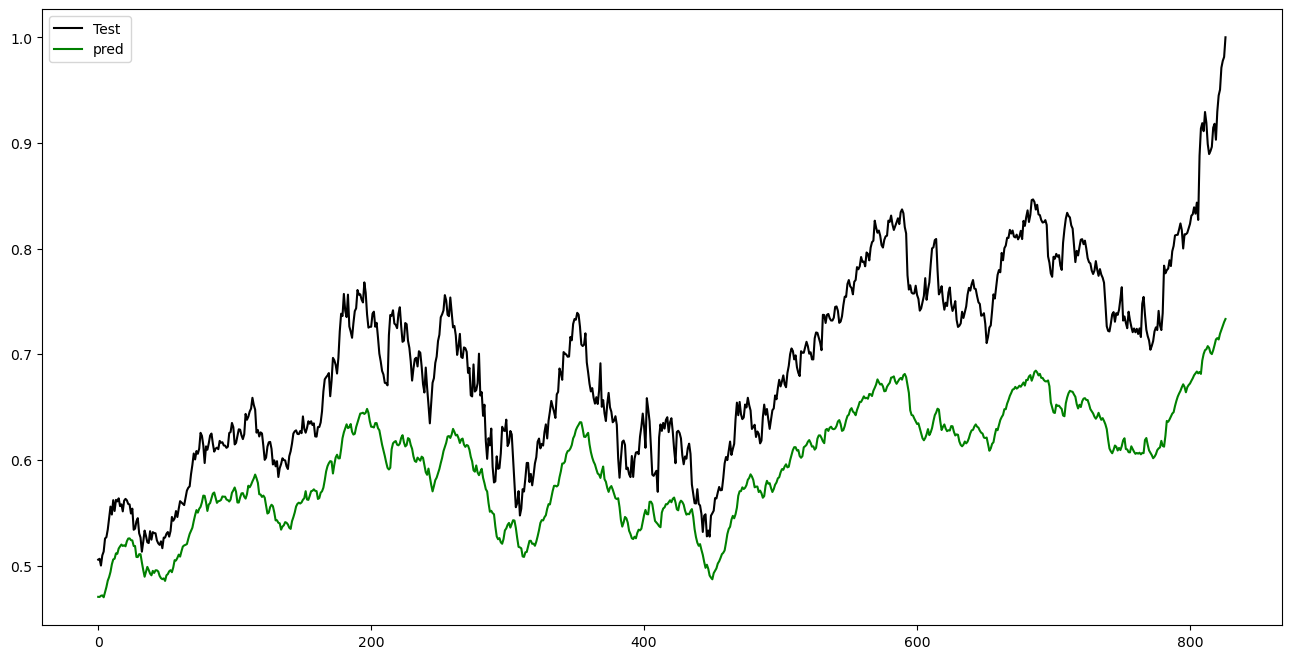

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:

# Assuming y_test and y_pred are NumPy arrays
indices = np.arange(len(y_test))  # Create an array of indices for the x-axis

# Adjust bar width as needed
bar_width = 0.5
plt.figure(figsize=(16, 8))
plt.bar(indices, y_test.flatten(), width=bar_width, label='Actual')
plt.bar(indices + bar_width, y_pred.flatten(), width=bar_width, label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('TargetNextClose')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.01088822600436186


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.10434666264122615


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.09528571697484584


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.24857650934660902


In [ ]:
# Assuming 'y_pred' is your NumPy array of predictions and 'data_set' is your original DataFrame
temp_df = pd.DataFrame(data_set_scaled[splitlimit+backcandles:, :-1])
temp_df['Predictions'] = y_pred
temp_df_scaled_back = sc.inverse_transform(temp_df)  # Scale back the temporary DataFrame
y_pred_scaled_back = temp_df_scaled_back[:, -1]  # Extract the scaled back predictions

In [ ]:
# predict Value
predictData = yf.download(tickers = 'AAPL', start = '2024-06-14',end = '2024-07-14')

[*********************100%***********************]  1 of 1 completed


#LSTM

In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

4362
[[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
  [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  ...
  [0.00233711 0.00199963 0.00244722 ... 0.42910964 0.57674006 0.00239712]
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]]

 [[0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.00131837 0.00177472 ... 0.42788764 0.54806094 0.0017672 ]
  ...
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]
  [0.0023022  0.0018845  0.00225713 ... 0.42609832 0.50773108 0.0021706 ]]

 [[0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.0

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(50)
batch_size = 16
epochs = 300

lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
inputs = LSTM(144, name='first_layer')(lstm_input)
inputs = Dense(112, name='dense_layer', activation='relu')(inputs)
inputs = Dense(64, name='dense_layer_2', activation='relu')(inputs)
inputs = Dense(64, name='dense_layer_3', activation='relu')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
lstm_output = Activation('linear', name='output')(inputs)
lstm_model = Model(inputs=lstm_input, outputs=lstm_output)


learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
lstm_model.compile(optimizer=optimizer, loss='mse')


lstm_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 144)               88704     
                                                                 
 dense_layer (Dense)         (None, 112)               16240     
                                                                 
 dense_layer_2 (Dense)       (None, 64)                7232      
                                                                 
 dense_layer_3 (Dense)       (None, 64)                4160      
                                                                 
 dense_layer_output (Dense)  (None, 1)                 65        
                                                                 
 output (Activation)         (None, 1)                 0   

In [ ]:
# lstm_adam = optimizers.Adam()
# lstm_model.compile(optimizer=adam, loss='mse')
lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/300
220/220 [==============================] - 4s 11ms/step - loss: 0.0024 - val_loss: 8.1977e-04
Epoch 2/300
220/220 [==============================] - 2s 9ms/step - loss: 1.5186e-04 - val_loss: 0.0064
Epoch 3/300
220/220 [==============================] - 2s 10ms/step - loss: 1.4842e-04 - val_loss: 0.0079
Epoch 4/300
220/220 [==============================] - 2s 10ms/step - loss: 6.6432e-05 - val_loss: 0.0019
Epoch 5/300
220/220 [==============================] - 2s 9ms/step - loss: 2.0384e-04 - val_loss: 0.0015
Epoch 6/300
220/220 [==============================] - 2s 9ms/step - loss: 3.9857e-04 - val_loss: 0.0011
Epoch 7/300
220/220 [==============================] - 3s 13ms/step - loss: 9.4920e-05 - val_loss: 0.0012
Epoch 8/300
220/220 [==============================] - 3s 15ms/step - loss: 1.1572e-04 - val_loss: 0.0022
Epoch 9/300
220/220 [==============================] - 3s 15ms/step - loss: 9.0692e-05 - val_loss: 8.8895e-04
Epoch 10/300
220/220 [=======================

In [ ]:
lstm_y_pred = lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(lstm_y_pred[i], y_test[i])

14/14 [==============================] - 0s 5ms/step
[0.60171086] [0.58903008]
[0.5678086] [0.60653757]
[0.5877917] [0.6123589]
[0.6109992] [0.61283677]
[0.6003199] [0.61079495]
[0.59270585] [0.62765082]
[0.6198049] [0.63712135]
[0.6259932] [0.64967635]
[0.62859315] [0.63668696]
[0.6210532] [0.61692042]


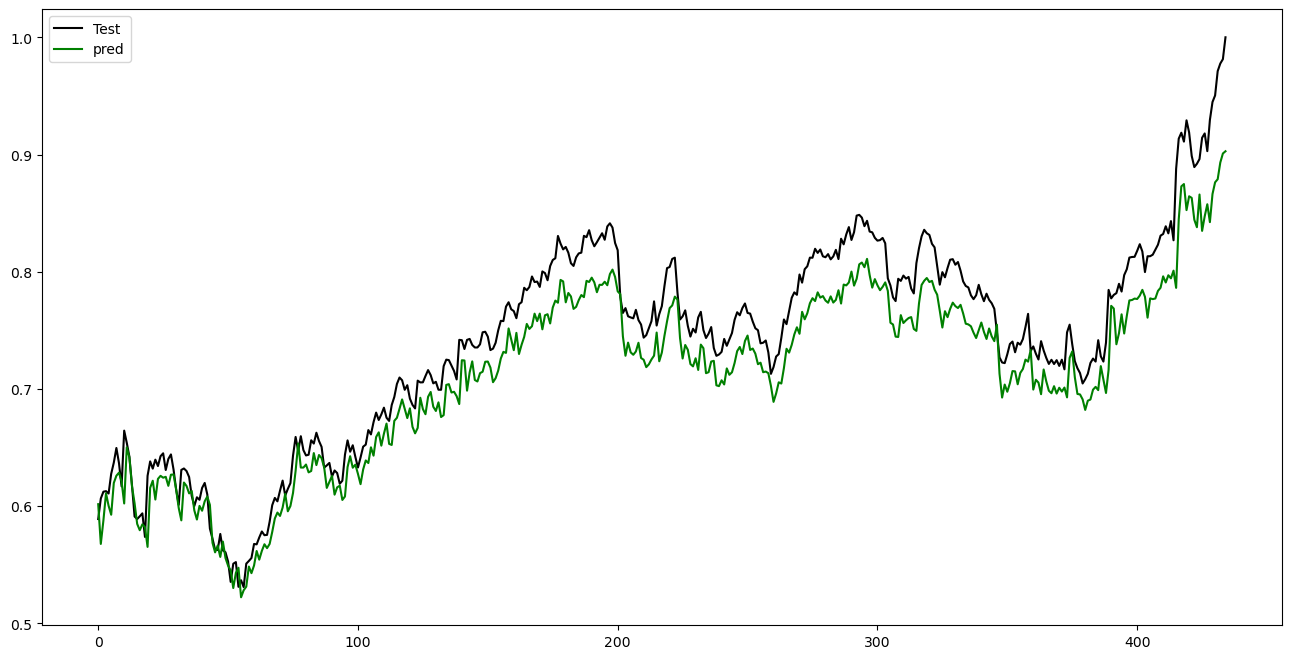

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
print("MSE:", lstm_mse)

lstm_rmse = np.sqrt(lstm_mse)
print("RMSE:", lstm_rmse)

from sklearn.metrics import mean_absolute_error
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
print("MAE:", lstm_mae)

from sklearn.metrics import r2_score
lstm_r2 = r2_score(y_test, lstm_y_pred)
print("R-squared:", lstm_r2)

MSE: 0.0010792366577895363
RMSE: 0.032851737515533885
MAE: 0.02864072037710642
R-squared: 0.8622594025763369


# Less Dense LSTM

In [14]:
# multiple feature from data provided to the model
X = []

backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9): #data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]): #backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

# move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

4362
[[[0.0013772  0.00126002 0.00156386 ... 0.42851318 0.56307372 0.00158257]
  [0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  ...
  [0.00233711 0.00199963 0.00244722 ... 0.42910964 0.57674006 0.00239712]
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]]

 [[0.00158981 0.00135621 0.00162935 ... 0.4263747  0.51167651 0.00183081]
  [0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.00131837 0.00177472 ... 0.42788764 0.54806094 0.0017672 ]
  ...
  [0.00251006 0.00209739 0.00237055 ... 0.42701478 0.52889    0.00249021]
  [0.00226571 0.00193339 0.00242965 ... 0.42938601 0.58320485 0.00223266]
  [0.0023022  0.0018845  0.00225713 ... 0.42609832 0.50773108 0.0021706 ]]

 [[0.00146129 0.00126159 0.00155268 ... 0.4308408  0.61994689 0.0017641 ]
  [0.00167707 0.0

In [15]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [27]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

tf.random.set_seed(41)

batch_size = 16
epochs = 120

LD_lstm_input = Input(shape=(backcandles, 9), name='lstm_input')

inputs = LSTM(104, name='first_layer')(LD_lstm_input)
inputs = Dense(128, name='dense_layer_1', activation='relu')(inputs)
inputs = Dense(1, name='dense_layer_output')(inputs)
LD_lstm_output = Activation('linear', name='output')(inputs)

LD_lstm_model = Model(inputs=LD_lstm_input, outputs=LD_lstm_output)

learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
LD_lstm_model.compile(optimizer=optimizer, loss='mse')


LD_lstm_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 104)               47424     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               13440     
                                                                 
 dense_layer_output (Dense)  (None, 1)                 129       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 60,993
Trainable params: 60,993
Non-trainable params: 0
_________________________________________________________________


In [28]:
LD_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/120
220/220 [==============================] - 3s 10ms/step - loss: 0.0024 - val_loss: 6.0540e-04
Epoch 2/120
220/220 [==============================] - 2s 7ms/step - loss: 7.0298e-05 - val_loss: 3.8820e-04
Epoch 3/120
220/220 [==============================] - 2s 7ms/step - loss: 9.8521e-05 - val_loss: 3.8292e-04
Epoch 4/120
220/220 [==============================] - 2s 8ms/step - loss: 4.9324e-05 - val_loss: 2.8837e-04
Epoch 5/120
220/220 [==============================] - 2s 7ms/step - loss: 6.1122e-05 - val_loss: 3.6129e-04
Epoch 6/120
220/220 [==============================] - 2s 7ms/step - loss: 8.0851e-05 - val_loss: 0.0031
Epoch 7/120
220/220 [==============================] - 2s 7ms/step - loss: 6.9456e-05 - val_loss: 3.1319e-04
Epoch 8/120
220/220 [==============================] - 2s 7ms/step - loss: 7.3969e-05 - val_loss: 6.3041e-04
Epoch 9/120
220/220 [==============================] - 2s 9ms/step - loss: 5.7378e-05 - val_loss: 6.1719e-04
Epoch 10/120
220/220 [====

In [29]:
LD_lstm_y_pred = LD_lstm_model.predict(X_test)

for i in range(10):
    print(LD_lstm_y_pred[i], y_test[i])

14/14 [==============================] - 0s 5ms/step
[0.59917456] [0.58903008]
[0.5852735] [0.60653757]
[0.59097654] [0.6123589]
[0.60472536] [0.61283677]
[0.6049382] [0.61079495]
[0.6020154] [0.62765082]
[0.61435443] [0.63712135]
[0.6233791] [0.64967635]
[0.6306832] [0.63668696]
[0.6262995] [0.61692042]


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, LD_lstm_y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, LD_lstm_y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, LD_lstm_y_pred)
print("R-squared:", r2)

MSE: 0.0019488492522967886
RMSE: 0.044145772756819975
MAE: 0.03645086040449311
R-squared: 0.75127266261524


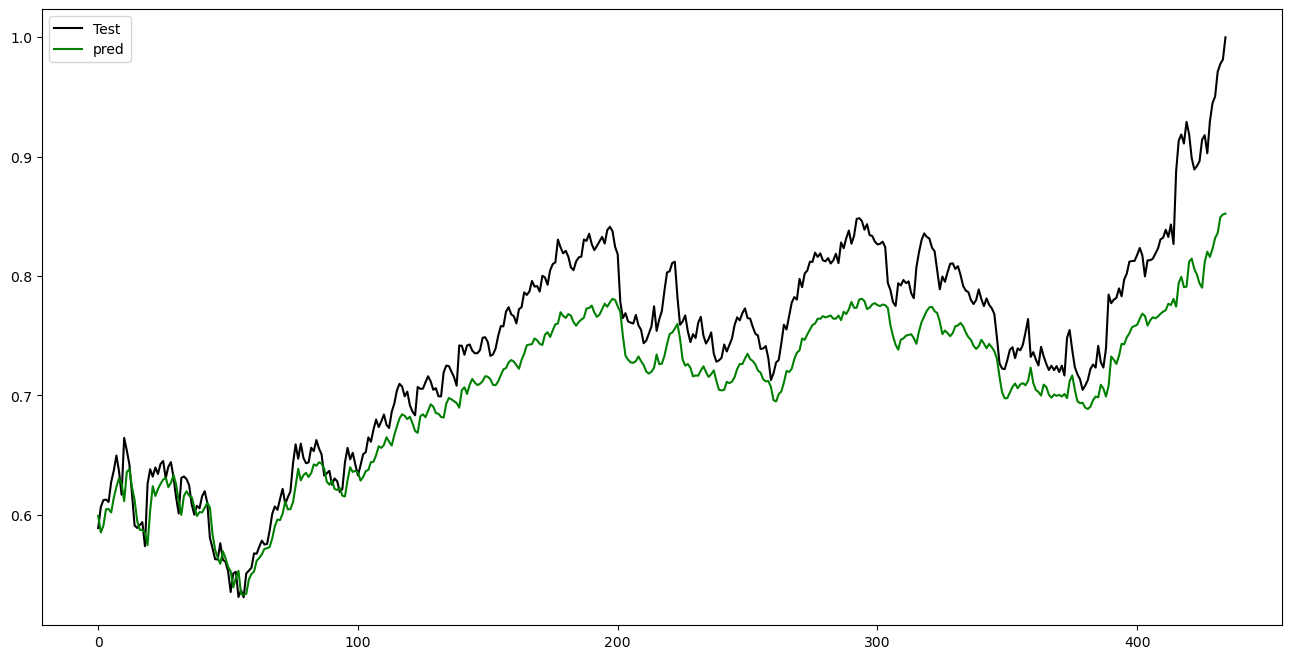

In [31]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(LD_lstm_y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

#Dense CNN-LSTM

In [13]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Convolution1D, MaxPooling1D, Flatten,  Embedding, Conv1D, GlobalMaxPooling1D
import numpy as np

# Define model parameters
conv_filters = 16
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 150
lstm_activation = 'tanh'

# time_step = 10

batch_size = 128
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# loss_function = 'mean_absolute_error'
epochs = 200

# Define the input
cnn_lstm_input = Input(shape=(backcandles, 9), name='cnn_lstm_input')

# Define the layers
cnn_lstm_conv_layer = Conv1D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, padding=conv_padding, name='conv_layer')(cnn_lstm_input)
pooling_layer = MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(cnn_lstm_conv_layer)
cnn_lstm_layer = LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(pooling_layer)
cnn_lstm_dense_layer_1 = Dense(32, activation='relu', name='dense_layer_1')(cnn_lstm_layer)
cnn_lstm_dense_layer_2 = Dense(32, activation='relu', name='dense_layer_3')(cnn_lstm_dense_layer_1)
cnn_lstm_dense_layer_output = Dense(1, name='dense_layer_output')(cnn_lstm_dense_layer_2)
cnn_lstm_output = Activation('linear', name='output')(cnn_lstm_dense_layer_output)

# Define the model
cnn_lstm_model = Model(inputs=cnn_lstm_input, outputs=cnn_lstm_output)

# # Compile the model
cnn_lstm_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
cnn_lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_lstm_input (InputLayer)  [(None, 21, 9)]          0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 32)            320       
                                                                 
 pooling_layer (MaxPooling1D  (None, 21, 32)           0         
 )                                                               
                                                                 
 lstm_layer (LSTM)           (None, 150)               109800    
                                                                 
 dense_layer_1 (Dense)       (None, 32)                4832      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                1056      
                                                           

In [ ]:
cnn_lstm_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/200
28/28 [==============================] - 4s 44ms/step - loss: 0.0275 - val_loss: 0.0035
Epoch 2/200
28/28 [==============================] - 1s 22ms/step - loss: 2.2768e-04 - val_loss: 0.0021
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 9.6889e-05 - val_loss: 0.0033
Epoch 4/200
28/28 [==============================] - 1s 20ms/step - loss: 6.3751e-05 - val_loss: 0.0041
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 6.1431e-05 - val_loss: 0.0020
Epoch 6/200
28/28 [==============================] - 1s 22ms/step - loss: 4.7700e-05 - val_loss: 0.0015
Epoch 7/200
28/28 [==============================] - 1s 22ms/step - loss: 5.3548e-05 - val_loss: 0.0027
Epoch 8/200
28/28 [==============================] - 1s 22ms/step - loss: 1.0941e-04 - val_loss: 7.7136e-04
Epoch 9/200
28/28 [==============================] - 1s 21ms/step - loss: 6.7469e-05 - val_loss: 0.0016
Epoch 10/200
28/28 [==============================] - 1s 22ms/st

14/14 [==============================] - 1s 8ms/step
[0.5976173] [0.58903008]
[0.5751362] [0.60653757]
[0.5971643] [0.6123589]
[0.5990104] [0.61283677]
[0.6007396] [0.61079495]
[0.59543437] [0.62765082]
[0.61290705] [0.63712135]
[0.6166547] [0.64967635]
[0.62627625] [0.63668696]
[0.61795145] [0.61692042]


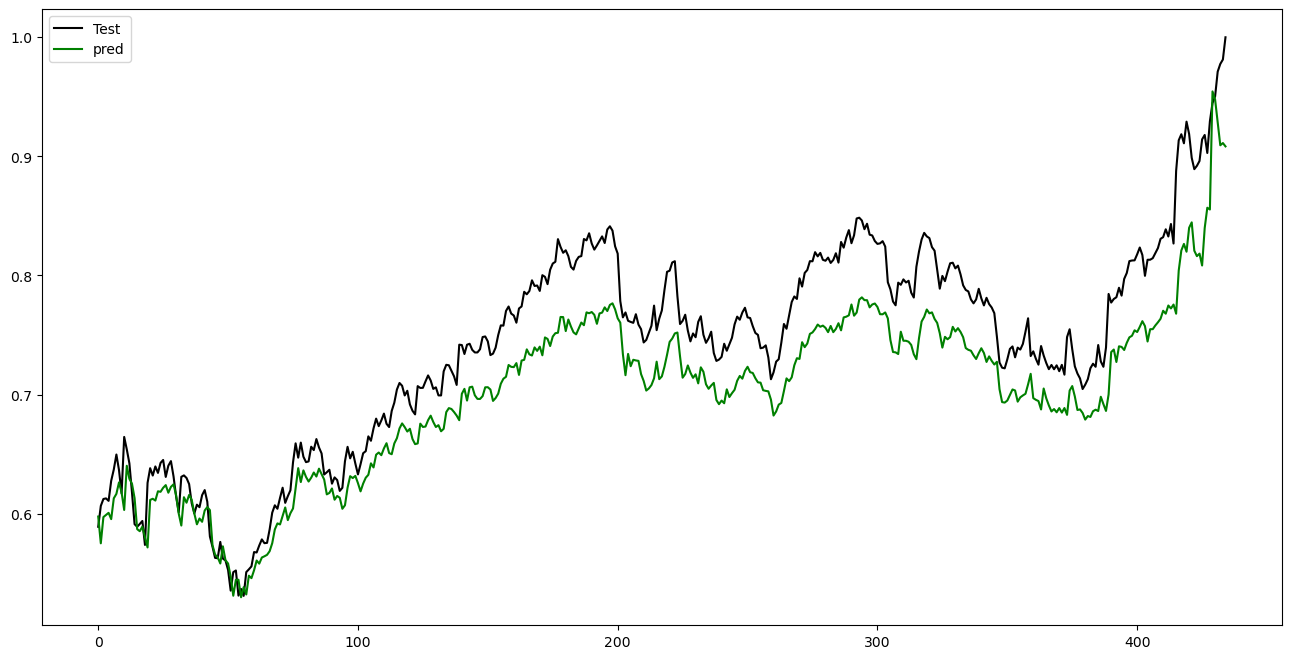

In [ ]:
y_pred = cnn_lstm_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# Less dense CNN-LSTM

In [7]:
# multiple feature from data provided to the model
X = []

backcandles = 21
print(data_set_scaled.shape[0])
for j in range(9): #data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi, (len(yi), 1))

# print(X)
print(X.shape)
# print(y)
print(y.shape)

4362
(4341, 21, 9)
(4341, 1)


In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
data_set.head(10)

3906
(3906, 21, 9)
(435, 21, 9)
(3906, 1)
(435, 1)
[[0.0021706 ]
 [0.00186805]
 [0.00205268]
 ...
 [0.59163661]
 [0.58885627]
 [0.60905726]]


,opening_price,highest_price,lowest_price,closing_price,volume,turnover,ups_and_downs,change,Close_next_day
0,3.145357,3.213929,3.142500,3.209643,729408400,2.341140e+09,0.000000,0.000000,3.157143
1,3.193214,3.235714,3.157143,3.157143,867890800,2.740055e+09,-0.052500,-1.635689,3.214286
2,3.164286,3.214286,3.140000,3.214286,796586000,2.560455e+09,0.057143,1.809958,3.198929
3,3.212857,3.227143,3.189643,3.198929,559498800,1.789797e+09,-0.015357,-0.477774,3.199643
4,3.197857,3.213929,3.190000,3.199643,571704000,1.829249e+09,0.000714,0.022315,3.254643
5,3.222857,3.269643,3.199643,3.254643,712961200,2.320434e+09,0.055000,1.718944,3.267143
6,3.262500,3.280000,3.252143,3.267143,488916400,1.597360e+09,0.012500,0.384068,3.352500
7,3.285357,3.357143,3.273214,3.352500,686896000,2.302819e+09,0.085357,2.612587,3.355714
8,3.347500,3.370000,3.321429,3.355714,561492400,1.884208e+09,0.003214,0.095872,3.340000
9,3.333929,3.359643,3.332143,3.340000,450884000,1.505953e+09,-0.015714,-0.468281,3.423214


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
# Model parameters
conv_filters = 128
conv_kernel_size = 1
conv_activation = 'tanh'
conv_padding = 'same'

pool_size = 1
pool_padding = 'same'

lstm_units = 176
lstm_activation = 'tanh'

dense_layer1 = 64

time_step = backcandles
features = 9  # Adjust this to match your data's feature size

batch_size = 128
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'mean_absolute_error'
epochs = 200

# Define initializers
weight_initializer = initializers.GlorotUniform()
bias_initializer = initializers.Zeros()

# Define the input
lstm_input = Input(shape=(time_step, features), name='lstm_input')

# Define the layers with initializers
conv_layer = layers.Conv1D(filters=conv_filters, kernel_size=conv_kernel_size,
                           activation=conv_activation, padding=conv_padding,
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer, name='conv_layer')(lstm_input)
# pooling_layer = layers.MaxPooling1D(pool_size=pool_size, padding=pool_padding, name='pooling_layer')(conv_layer)
lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation,
                         kernel_initializer=weight_initializer,
                         bias_initializer=bias_initializer, name='lstm_layer')(conv_layer) # pooling_layer
dense_layer = layers.Dense(dense_layer1, name='dense_layer',
                           kernel_initializer=weight_initializer,
                           bias_initializer=bias_initializer)(lstm_layer)
# output = layers.Activation('linear', name='output')(dense_layer)
output = layers.Dense(1, activation='linear', name='output')(dense_layer)
# Define the model
less_dense_lstm_cnn_model = Model(inputs=lstm_input, outputs=output)

# Compile the model
less_dense_lstm_cnn_model.compile(optimizer=optimizer, loss=['mse'])

# Summary of the model
less_dense_lstm_cnn_model.summary()

# Assuming you have training data in `X_train` and `y_train`
# Here X_train and y_train are placeholders, replace with your actual data
# X_train = scaled_data
# y_train = np.random.rand(1000, 1)  # Replace with your actual labels

# You can fit the model with:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 21, 9)]           0         
                                                                 
 conv_layer (Conv1D)         (None, 21, 128)           1280      
                                                                 
 lstm_layer (LSTM)           (None, 176)               214720    
                                                                 
 dense_layer (Dense)         (None, 64)                11328     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 227,393
Trainable params: 227,393
Non-trainable params: 0
_________________________________________________________________


In [21]:
less_dense_lstm_cnn_model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split = 0.1)

Epoch 1/200
28/28 [==============================] - 1s 47ms/step - loss: 0.0022 - val_loss: 9.9912e-04
Epoch 2/200
28/28 [==============================] - 1s 45ms/step - loss: 9.2888e-05 - val_loss: 0.0025
Epoch 3/200
28/28 [==============================] - 1s 48ms/step - loss: 3.9662e-05 - val_loss: 9.6939e-04
Epoch 4/200
28/28 [==============================] - 1s 44ms/step - loss: 2.9094e-05 - val_loss: 5.9235e-04
Epoch 5/200
28/28 [==============================] - 1s 44ms/step - loss: 3.0081e-05 - val_loss: 5.9171e-04
Epoch 6/200
28/28 [==============================] - 1s 46ms/step - loss: 3.6909e-05 - val_loss: 8.0591e-04
Epoch 7/200
28/28 [==============================] - 1s 44ms/step - loss: 2.9117e-05 - val_loss: 3.0757e-04
Epoch 8/200
28/28 [==============================] - 1s 45ms/step - loss: 2.5816e-05 - val_loss: 3.2451e-04
Epoch 9/200
28/28 [==============================] - 1s 52ms/step - loss: 2.9793e-05 - val_loss: 4.7847e-04
Epoch 10/200
28/28 [================

14/14 [==============================] - 0s 8ms/step
[0.60026324] [0.58903008]
[0.5709357] [0.60653757]
[0.593714] [0.6123589]
[0.59991723] [0.61283677]
[0.6025619] [0.61079495]
[0.59644276] [0.62765082]
[0.6145776] [0.63712135]
[0.6167326] [0.64967635]
[0.6307658] [0.63668696]
[0.6186632] [0.61692042]


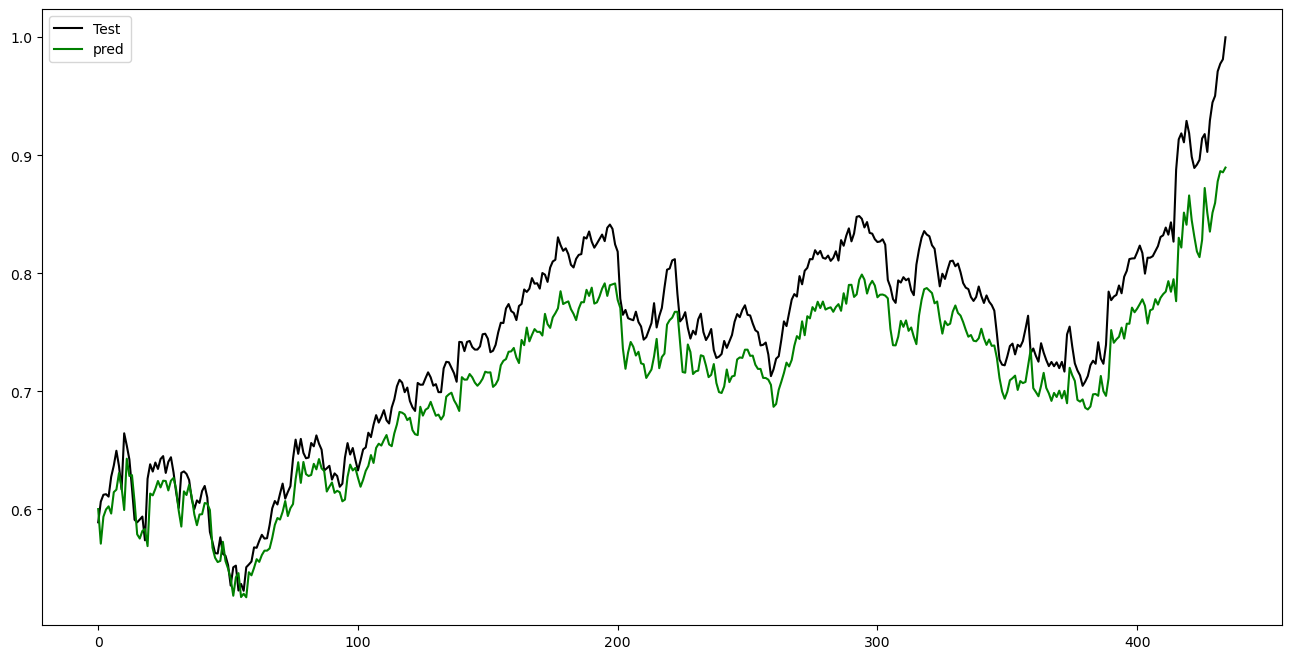

In [22]:
y_pred = less_dense_lstm_cnn_model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 0.001433551920866479
RMSE: 0.0378622756958226
MAE: 0.03326845476394233
R-squared: 0.8170389259919901


In [ ]:
y_pred_original_scale = sc.inverse_transform(y_pred[], y_pred[:, -1])

# Hypertuning parameters less Dense CNN-LSTM

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, initializers
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 14
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])
    # Model parameters with hyperparameter options
    conv_filters = hp.Int('conv_filters', min_value=16, max_value=256, step=8)
    conv_kernel_size = 1
    conv_activation = 'tanh'
    conv_padding = 'same'

    pool_size = 1
    pool_padding = 'same'

    lstm_units = hp.Int('lstm_units', min_value=16, max_value=256, step=8)
    lstm_activation = 'tanh'

    dense_units = hp.Int('dense_units', min_value=16, max_value=256, step=8)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define initializers
    weight_initializer = initializers.GlorotUniform()
    bias_initializer = initializers.Zeros()

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    conv_layer = layers.Conv1D(filters=conv_filters,
                               kernel_size=conv_kernel_size,
                               activation=conv_activation,
                               padding=conv_padding,
                               name='conv_layer')(lstm_input)
    pooling_layer = layers.MaxPooling1D(pool_size=pool_size,
                                padding=pool_padding,
                                name='pooling_layer')(conv_layer)
    lstm_layer = layers.LSTM(lstm_units,
                             activation=lstm_activation,
                             name='lstm_layer')(pooling_layer)
    dense_layer = layers.Dense(dense_units,
                               activation='relu',
                               name='dense_layer')(lstm_layer)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [10]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='cnn_lstm_hyperparameter_tuning5')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {best_hps.get('batch_size')},
The optimal number of filters in the convolutional layer is {best_hps.get('conv_filters')},
the optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
the optimal number of units in the dense layer is {best_hps.get('dense_units')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 725 Complete [00h 00m 26s]
val_mae: 0.015339784324169159

Best val_mae So Far: 0.01078853104263544
Total elapsed time: 03h 08m 42s

the optimal number of bath_size is 256,
The optimal number of filters in the convolutional layer is 104,
the optimal number of units in the LSTM layer is 256,
the optimal number of units in the dense layer is 192,
and the optimal learning rate for the optimizer is 0.001.



# Hypertuning parameters Dense LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 9
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])

    # Model parameters with hyperparameter options
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)
    lstm_activation = 'tanh'


    dense_units_layer1 = hp.Int('dense_units_layer1', min_value=16, max_value=128, step=16)
    dense_units_layer2 = hp.Int('dense_units_layer2', min_value=16, max_value=128, step=16)
    dense_units_layer3 = hp.Int('dense_units_layer3', min_value=16, max_value=128, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(lstm_input)
    dense_layer1 = layers.Dense(dense_units_layer1, activation='relu', name='dense_layer_layer1')(lstm_layer)
    dense_layer2 = layers.Dense(dense_units_layer2, activation='relu', name='dense_layer_layer2')(dense_layer1)
    dense_layer3 = layers.Dense(dense_units_layer3, activation='relu', name='dense_layer_layer3')(dense_layer2)
    output = layers.Dense(1, activation='linear', name='output')(dense_layer3)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='dense_lstm_hyperparameter_tuning')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {best_hps.get('batch_size')},
the optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
the optimal number of units in the dense layer 1 is {best_hps.get('dense_units_layer1')},
the optimal number of units in the dense layer 2 is {best_hps.get('dense_units_layer2')},
the optimal number of units in the dense layer 3 is {best_hps.get('dense_units_layer3')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 725 Complete [00h 00m 18s]
val_mae: 0.014084316790103912

Best val_mae So Far: 0.010916391387581825
Total elapsed time: 02h 15m 10s

the optimal number of bath_size is 16,
the optimal number of units in the LSTM layer is 144,
the optimal number of units in the dense layer 1 is 112,
the optimal number of units in the dense layer 2 is 64,
the optimal number of units in the dense layer 3 is 64,
and the optimal learning rate for the optimizer is 0.01.



# Hypertuning parameters Less Dense LSTM

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
import keras_tuner as kt
batch_size = 128

def build_model(hp):

    features = 9
    time_step = 21 # hp.Choice('time_step', values=[7, 14, 21, 28, 35])
    batch_size = hp.Choice('batch_size', values=[16, 32, 64, 128, 256, 512])

    # Model parameters with hyperparameter options
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=256, step=8)
    lstm_activation = 'tanh'


    dense_units_layer1 = hp.Int('dense_units_layer1', min_value=16, max_value=128, step=16)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the input
    lstm_input = Input(shape=(time_step, features), name='lstm_input')

    # Define the layers with initializers
    lstm_layer = layers.LSTM(lstm_units, activation=lstm_activation, name='lstm_layer')(lstm_input)
    dense_layer1 = layers.Dense(dense_units_layer1, activation='relu', name='dense_layer_layer1')(lstm_layer)
    dense_layer_output = layers.Dense(1, name='dense_layer_output')(dense_layer1)
    output = layers.Activation('linear', name='output')(dense_layer_output)

    # Define the model
    model = Model(inputs=lstm_input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mae'])

    return model


In [10]:
tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=500,
                     factor=3,
                     directory='my_dir',
                     project_name='less_dense_lstm_hyperparameter_tuning')

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

tuner.search(X_train, y_train, epochs=500, batch_size=batch_size, validation_split=0.1, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
the optimal number of bath_size is {best_hps.get('batch_size')},
the optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
the optimal number of units in the dense layer 1 is {best_hps.get('dense_units_layer1')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 725 Complete [00h 00m 06s]
val_mae: 0.019161544740200043

Best val_mae So Far: 0.009953239001333714
Total elapsed time: 02h 24m 05s

the optimal number of bath_size is 16,
the optimal number of units in the LSTM layer is 104,
the optimal number of units in the dense layer 1 is 128,
and the optimal learning rate for the optimizer is 0.01.

